In [101]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import matplotlib.pyplot as plt

In [7]:
# File containing text I've already cleaned of URLs, hashtags, and @ mentions
file = "../Coronavirus/clean_text.txt"

### Quick look at string functions
Using a sample string containing punctuation, I'll look at how it reacts to various methods. My goal here is to return all words cleaned of punctuation.

In [54]:
s = 'sample string, has "534" stuff to clean!'

# `False` means the string contains non-alphanumeric words and punctuation
s.isalnum()

False

In [79]:
# If we split the string, three of the words have punctuation attached
s.split()

['sample', 'string,', 'has', '"534"', 'stuff', 'to', 'clean!']

In [82]:
# Splitting and returning only alphanumeric words eliminates the words 
# with punctuation, and this isn't what I want to do.
[word for word in s.split() if word.isalnum()]

['sample', 'has', 'stuff', 'to']

### Stripping punctuation from words in a string
This is a multi-step process:

    1) use list comprehension to strip all punctuation from the string
    2) join the list back into a string
    3) split the string into separate words

All of this can be accomplished in a single line after the import statement.

In [86]:
import string

''.join(char for char in s if char not in string.punctuation).split()

['sample', 'string', 'has', '534', 'stuff', 'to', 'clean']

### Word Processing
I'll read in the text file, then tokenize the text, excluding stopwords (words that are so common that their meaning isn't always useful), and punctuation. I'll process the same text later, leaving in stopwords. This is just a quicker way to train because it removes more words from the vocabulary that has to be trained.

In [100]:
# Creating a global variable for this notebook that includes not just
# stopwords from NLTK, but also punctuation from the string library
stopwords = stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
def read_text(file):
    """
    Uses Python to open text file and return text object.
    """
    with open(file, 'r') as infile:
        text = infile.read()
        return text

In [88]:
# Initial processing
def process_text(text):
    """
    Strips txt file of stopwords and returns a list of tokenized
    words containing only words that are alphanumeric.
    Assumes `string` and `nltk` have been imported, as well as 
    `from nltk.corpus import stopwords`.
    """ 
    # Using NLTK
    tokens = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric words 
    words = [word for word in tokens if word.isalnum()]
    
    # Remove punctuation
    words = [word for word in words if not word in string.punctuation]
    
    # Create list of words that excludes stopwords
    words = [word for word in words if not word in stopwords]
    
    return words

In [21]:
text = read_text(file)

In [22]:
# Checking 
text[:500]

'to each and every person celebrating this news, saying “karma” or whatever other snide comment you’re using, fuck y… and yet asymptomati… coronavirus is one thing. we clearly can’t be closing down golf courses though. with down, this also failed to be sent out earlier this afternoon (attachement to the letter) i don’t understand why famous people who “ feel like they’re getting a cold “ can automatically get tested for coro… i want to say this again because it’s bonkers. dr. ho had developed ant'

In [89]:
# Processing text
tokenized = process_text(text)

In [91]:
# Note that this has also removed partial words like 'asymptomati...' that 
# contain meaning
print(tokenized[:50])

['every', 'person', 'celebrating', 'news', 'saying', 'karma', 'whatever', 'snide', 'comment', 'using', 'fuck', 'yet', 'coronavirus', 'one', 'thing', 'clearly', 'closing', 'golf', 'courses', 'though', 'also', 'failed', 'sent', 'earlier', 'afternoon', 'attachement', 'letter', 'understand', 'famous', 'people', 'feel', 'like', 'getting', 'cold', 'automatically', 'get', 'tested', 'want', 'say', 'bonkers', 'ho', 'developed', 'antibodies', 'could', 'used', 'breaking', 'nfl', 'news', 'trump', 'says']


### Quick graphing

In [103]:
# Use FreqDist to count top 10 words
frequencies = nltk.FreqDist(tokenized)

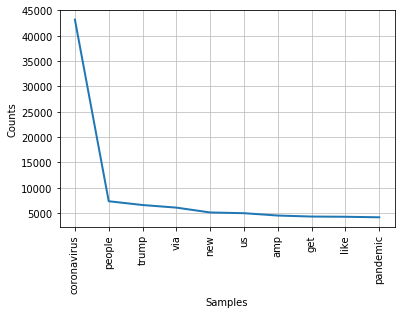

In [104]:
# It's evident from this that 'coronavirus' is the overwhelming #1 word --
# not a surprise since that the keyword I used to pull these tweets
frequencies.plot(10)

In [121]:
# This one is pretty popular
print(frequencies['fuck'])

2215


### N-grams
How often do two or more words occur together?

In [106]:
# Top 10 group of two words occurring together
# New York was getting a lot of attention at the time these tweets were gathered
ngrams = nltk.ngrams(tokenized, 2)
nltk.FreqDist(ngrams).most_common(10)

[(('coronavirus', 'pandemic'), 1823),
 (('positive', 'coronavirus'), 1491),
 (('coronavirus', 'outbreak'), 1229),
 (('amid', 'coronavirus'), 1159),
 (('coronavirus', 'crisis'), 1108),
 (('tests', 'positive'), 1084),
 (('new', 'york'), 1010),
 (('stay', 'home'), 961),
 (('due', 'coronavirus'), 924),
 (('coronavirus', 'cases'), 870)]

In [107]:
# Top 10 group of three words occurring together
ngrams = nltk.ngrams(tokenized, 3)
nltk.FreqDist(ngrams).most_common(10)

[(('tests', 'positive', 'coronavirus'), 834),
 (('tested', 'positive', 'coronavirus'), 402),
 (('amid', 'coronavirus', 'pandemic'), 329),
 (('families', 'first', 'coronavirus'), 267),
 (('office', 'tests', 'positive'), 264),
 (('first', 'coronavirus', 'response'), 252),
 (('pence', 'office', 'tests'), 252),
 (('coronavirus', 'response', 'act'), 248),
 (('member', 'vice', 'president'), 227),
 (('vice', 'president', 'mike'), 222)]

### Word Stems
Taking a look at word stems reduces length of vocabulary to be trained. It also can provide a better sense of the frequency of words, as it removes endings indicating number and tense and makes them all uniform.

For example, 'tests', 'test', and 'tested' all return as 'test'.

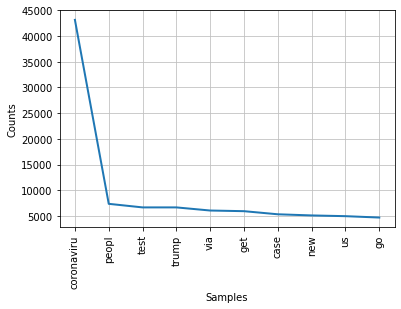

In [108]:
# create stemmer object
stemmer = PorterStemmer()

# make a list of word stems from the tokenized words
stems = [stemmer.stem(word) for word in tokenized]

# look at frequency of stems and plot the top 10
frequencies = nltk.FreqDist(stems)
frequencies.plot(10)

# This list is slightly different than the previous one; 'test', for example, is
# now the #3 word instead of 'trump'

In [126]:
# What are the top 25?
frequencies.most_common(25)

# One thing I'm noticing is 'amp' -- the way & is translated; 
# this needs to be added to the stopword list for my purposes

[('coronaviru', 43150),
 ('peopl', 7362),
 ('test', 6667),
 ('trump', 6667),
 ('via', 6059),
 ('get', 5932),
 ('case', 5327),
 ('new', 5104),
 ('us', 4961),
 ('go', 4694),
 ('like', 4633),
 ('time', 4523),
 ('amp', 4501),
 ('need', 4370),
 ('pandem', 4272),
 ('say', 4227),
 ('help', 3951),
 ('one', 3849),
 ('news', 3784),
 ('home', 3325),
 ('work', 3300),
 ('know', 3151),
 ('day', 3092),
 ('take', 3024),
 ('make', 3018)]

### Investigating individual words
It can be interesting and informative to see where and when words appear. If the distribution is not uniform across time, it may point to a particular event happening. 

I'll make a Text object from the tokenized list of words and run a few methods to look at what I've got.

In [110]:
text = nltk.Text(tokenized)

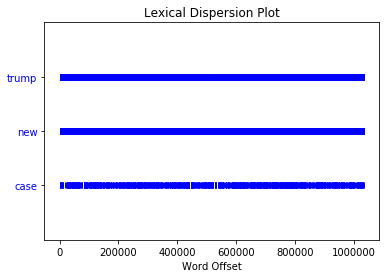

In [112]:
# Plotting three of the top 10 words
text.dispersion_plot(['trump', 'new', 'case'])

# These are all consistent across time and therefore not informative

This is all very basic and just a way to look quickly at word distribution. For modeling, I'll use BERT, which doesn't require the same kind of tokenization.